<H1> MONTAGEM DOS DADOS </H1>

***
## <font color="#106eb2" size=12>Projeto CoViData</font>
***

***
## <font color="#106eb2" size=6>Notebook 02 - Análise Visual dos Dados</font>
***

<h1>Raspagem dos dados de Piramide Populacional<h1>

### - Livro de Estatistica / Subir Notebook do Curso / Subir este notebook

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from matplotlib.gridspec import GridSpec



<H1>Leitura dos dados consolidados </H1>


In [51]:
df = pd.read_csv('data/consolidadoWHO.csv', sep = ',')
df.head()
df.dropna(subset=['MORTES_POR_MILHAO', 'CASOS_POR_MILHAO'], inplace=True)
df.head()

,AREA,PAIS,CONTINENTE,SUB_REGIAO,ISO,0-4,5-9,10-14,15-19,20-24,...,URBANIZACAO,GINI,GASTOS_SAUDE,EXPECTATIVA_VIDA,DENSIDADE_MEDICOS,DENSIDADE_LEITOS_POR_MIL,CASOS,MORTES,CASOS_POR_MILHAO,MORTES_POR_MILHAO
0,9388211,CHINA,ASIA,EASTERN ASIA,CHN,82832536.0,80530944.0,77715286.0,74503800.0,85502189.0,...,0.625,38.5,0.054,76.31,1.98,4.3,119837,5621,81.5,3.8
1,2973190,INDIA,ASIA,SOUTHERN ASIA,IND,116320763.0,116134270.0,116406628.0,116858691.0,115304620.0,...,0.354,35.7,0.035,70.03,0.86,0.5,31216337,418480,22620.5,303.2
2,9147420,UNITED STATES,AMERICA DO NORTE,NORTHERN AMERICA,USA,20438539.0,20200409.0,20769978.0,21038355.0,21899476.0,...,0.829,41.1,0.169,80.43,2.61,NaN,33828878,604252,102201.2,1825.5
3,1811570,INDONESIA,ASIA,SOUTH-EASTERN ASIA,IDN,20478078.0,21201103.0,22058099.0,22512791.0,22234259.0,...,0.573,37.8,0.029,72.82,0.43,1.0,2983830,77583,10908.9,283.6
4,770880,PAKISTAN,ASIA,SOUTHERN ASIA,PAK,29778193.0,28245207.0,26050219.0,23773611.0,21298570.0,...,0.374,33.5,0.032,69.37,0.98,0.6,991727,22811,4489.6,103.3


<H1>Avaliação Visual das Informações</H1>

## Avaliação Visual de Casos / Mortes por 100.000 (Histograma)

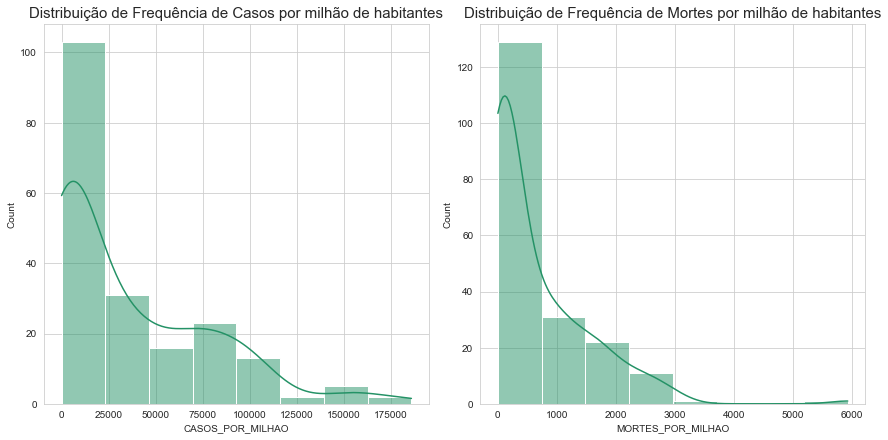

In [52]:
fig = plt.figure(constrained_layout=True)
gs = GridSpec(1, 2, figure=fig)
fig.set_size_inches(20,15)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

#Usando a Regra de Sturges para definir o número de bins
k = int(1 + 10/3 * np.log10(df.shape[0]))

sns.set_style("whitegrid")
ax = sns.histplot(data=df.CASOS_POR_MILHAO, bins=k, palette=sns.color_palette("husl", n_colors=1), kde=True, ax = ax0)
ax.set_title('Distribuição de Frequência de Casos por milhão de habitantes', fontsize = 15)
ax.figure.set_size_inches(12,6)


sns.set_style("whitegrid")
ax = sns.histplot(data=df.MORTES_POR_MILHAO, bins=k, palette=sns.color_palette("husl", n_colors=1), kde=True, ax = ax1)
ax.set_title('Distribuição de Frequência de Mortes por milhão de habitantes', fontsize = 15)
ax.figure.set_size_inches(12,6)

In [53]:
paisesCasosMaior10Mil =  pd.DataFrame()
paisesCasosMaior10Mil = df.query('CASOS_POR_MILHAO > 90000')[['PAIS', 'CASOS_POR_MILHAO']]
paisesCasosMaior10Mil.columns = ['PAIS', 'CASOS POR MILHAO']
paisesCasosMaior10Mil.sort_values(by='CASOS POR MILHAO', inplace=True, ascending=False)
paisesCasosMaior10Mil.index = range(paisesCasosMaior10Mil.shape[0])
paisesCasosMaior10Mil

,PAIS,CASOS POR MILHAO
0,ANDORRA,186099.8
1,SEYCHELLES,178358.3
2,MONTENEGRO,160404.5
3,BAHRAIN,157431.8
4,CZECH REPUBLIC (CZECHIA),156320.8
5,SAN MARINO,150333.0
6,MALDIVES,140946.9
7,SLOVENIA,123236.2
8,LUXEMBOURG,116711.5
9,URUGUAY,109125.3


In [54]:
paisesMortesMaior200 =  pd.DataFrame()
paisesMortesMaior200 = df.query('MORTES_POR_MILHAO > 2000')[['PAIS', 'MORTES_POR_MILHAO']]
paisesMortesMaior200.columns = ['PAIS', 'MORTES POR MILHAO']
paisesMortesMaior200.sort_values(by='MORTES POR MILHAO', inplace=True, ascending=False)
paisesMortesMaior200.index = range(paisesMortesMaior200.shape[0])
paisesMortesMaior200

,PAIS,MORTES POR MILHAO
0,PERU,5921.5
1,HUNGARY,3072.7
2,BOSNIA AND HERZEGOVINA,2947.1
3,CZECH REPUBLIC (CZECHIA),2837.3
4,SAN MARINO,2651.9
5,NORTH MACEDONIA,2634.2
6,BULGARIA,2615.8
7,MONTENEGRO,2584.1
8,BRAZIL,2553.4
9,SLOVAKIA,2296.5


## Avaliação Visual de Casos / Mortes por Milhão (Boxplot)


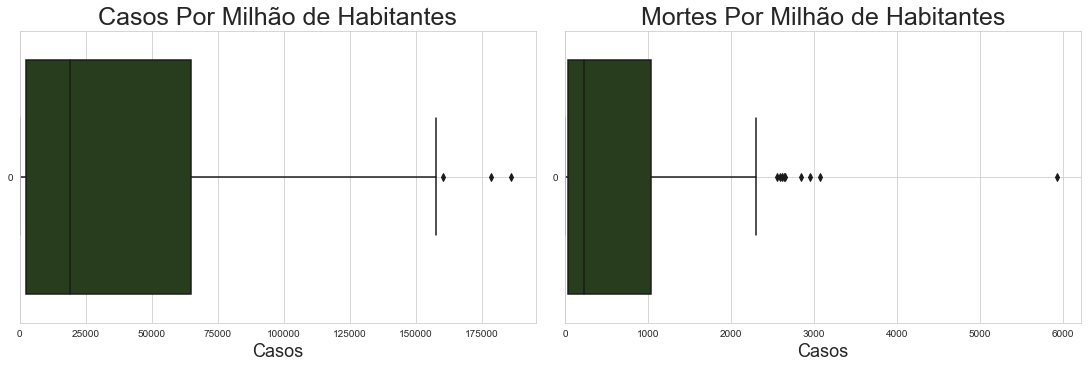

In [55]:
fig = plt.figure(constrained_layout=True)
gs = GridSpec(1, 2, figure=fig)
fig.set_size_inches(15,5)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

sns.set_palette(sns.diverging_palette(120, 0, l=25, n=1))
sns.boxplot(data=df.CASOS_POR_MILHAO, orient='h', ax=ax0)
ax0.set_title('Casos Por Milhão de Habitantes', fontsize=25)
ax0.set_xlabel('Casos', fontsize=18)
ax0.set_xlim(xmin=0, xmax=(df.CASOS_POR_MILHAO.max() * 1.05))
ax0.grid(True)

sns.set_palette(sns.diverging_palette(120, 0, l=25, n=1))
ax = sns.boxplot(data=df.MORTES_POR_MILHAO, orient='h', ax=ax1)
ax1.set_title('Mortes Por Milhão de Habitantes', fontsize=25)
ax1.set_xlabel('Casos', fontsize=18)
ax1.set_xlim(xmin=0, xmax=(df.MORTES_POR_MILHAO.max() * 1.05))
ax1.grid(True)

### Buscando Outliers no número de Casos e Mortes por 100 mil Habitantes

In [56]:
def outliers(series : pd.Series) :
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iiq = (q3 - q1)
    inf = q1 - (1.5 * iiq)
    sup = q3 + (1.5 * iiq)
    if (inf < 0) :
        inf = 0
    return inf, sup

In [57]:
_, sup_casos = outliers(df.CASOS_POR_MILHAO)
print(f'Considera-se outliers no número de casos, países com mais de {sup_casos} casos por milhão habitantes')
paisesOutliersCasos =  pd.DataFrame()
paisesOutliersCasos = df.query(f'CASOS_POR_MILHAO > {sup_casos}')[['PAIS', 'CASOS_POR_MILHAO']]
paisesOutliersCasos.columns = ['PAIS', 'CASOS POR MILHAO']

paisesOutliersCasos.sort_values(by='CASOS POR MILHAO', ascending=False, inplace=True)
paisesOutliersCasos.index = range(paisesOutliersCasos.shape[0])

paisesOutliersCasos

Considera-se outliers no número de casos, países com mais de 158650.77500000002 casos por milhão habitantes


,PAIS,CASOS POR MILHAO
0,ANDORRA,186099.8
1,SEYCHELLES,178358.3
2,MONTENEGRO,160404.5


In [58]:
_, sup_mortes = outliers(df.MORTES_POR_MILHAO)
print(f'Considera-se outliers no número de casos, países com mais de {sup_mortes} mortes por milhão habitantes')
paisesOutliersMortes =  pd.DataFrame()
paisesOutliersMortes = df.query(f'MORTES_POR_MILHAO > {sup_mortes}')[['PAIS', 'MORTES_POR_MILHAO']]
paisesOutliersMortes.columns = ['PAIS', 'MORTES POR MILHAO']
paisesOutliersMortes.sort_values(by='MORTES POR MILHAO', ascending=False, inplace=True)
paisesOutliersMortes.index = range(paisesOutliersMortes.shape[0])
paisesOutliersMortes

Considera-se outliers no número de casos, países com mais de 2538.825 mortes por milhão habitantes


,PAIS,MORTES POR MILHAO
0,PERU,5921.5
1,HUNGARY,3072.7
2,BOSNIA AND HERZEGOVINA,2947.1
3,CZECH REPUBLIC (CZECHIA),2837.3
4,SAN MARINO,2651.9
5,NORTH MACEDONIA,2634.2
6,BULGARIA,2615.8
7,MONTENEGRO,2584.1
8,BRAZIL,2553.4


In [59]:
def linha_tendencia(x : pd.Series, y : pd.Series) :
    X = sm.add_constant(x)
    results = sm.OLS(y, X).fit()
    b = results.params[0]
    a = results.params[1]
    resultados = []
    for i in range(x.size) :
        if(not np.isnan(x[i])) :
            resultados.append(a * x[i] + b)
    return resultados     





In [60]:
df.CASOS_POR_MILHAO.isna().value_counts()

False    195
Name: CASOS_POR_MILHAO, dtype: int64

In [61]:
df.index = range(df.shape[0])
resultados = linha_tendencia(df.CASOS_POR_MILHAO, df.MORTES_POR_MILHAO)


<AxesSubplot:title={'center':'Correlação das Mortes por Milhão x Casos por Milhão'}, xlabel='Casos por Milhão', ylabel='Mortes por Milhão'>

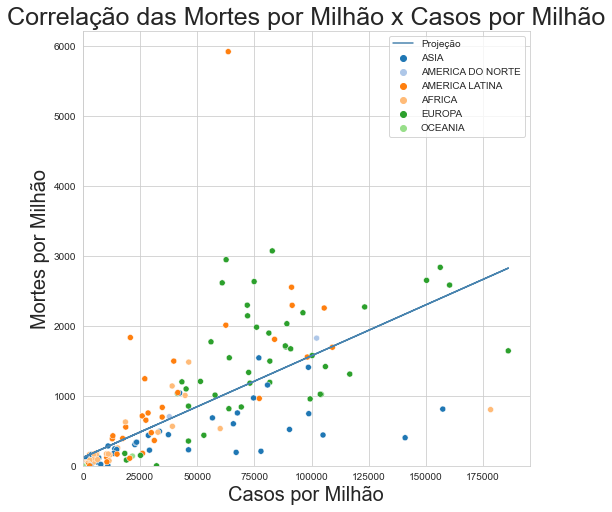

In [62]:
fig, ax0 = plt.subplots()
fig.set_size_inches(8,8)
sns.scatterplot(y='MORTES_POR_MILHAO', x='CASOS_POR_MILHAO', data=df, palette='tab20', ax=ax0, hue='CONTINENTE')
ax0.set_title('Correlação das Mortes por Milhão x Casos por Milhão', fontsize=25)
ax0.set_xlabel('Casos por Milhão', fontsize=20)
ax0.set_ylabel('Mortes por Milhão', fontsize=20)
ax0.set_xlim(0, max(df.CASOS_POR_MILHAO) * 1.05)
ax0.set_ylim(0, max(df.MORTES_POR_MILHAO) * 1.05)

sns.lineplot(x = df.CASOS_POR_MILHAO, y=resultados, color='#4984af', markers=True, sort=False, label="Projeção", ax=ax0)

ax0

In [63]:
y = df['MORTES_POR_MILHAO']
X = df.CASOS_POR_MILHAO
X_Const = sm.add_constant(X)
model = sm.OLS(y,X_Const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      MORTES_POR_MILHAO   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     199.0
Date:                Wed, 13 Oct 2021   Prob (F-statistic):           1.61e-31
Time:                        20:14:51   Log-Likelihood:                -1524.6
No. Observations:                 195   AIC:                             3053.
Df Residuals:                     193   BIC:                             3060.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              119.4348     57.654  

In [64]:
dfBrazil = df.query("PAIS=='BRAZIL'")
dfCondensada = pd.DataFrame(df)

dfCondensada['ABAIXO_25'] = (dfCondensada['0-4'] +  dfCondensada['5-9'] + 
                             dfCondensada['10-14'] +  dfCondensada['15-19'])
dfCondensada['ENTRE_25_40'] = (dfCondensada['20-24'] + dfCondensada['25-29'] +
                               dfCondensada['30-34'] + dfCondensada['35-39'])
dfCondensada['ENTRE_40_60'] = (dfCondensada['40-44'] + dfCondensada['45-49'] +
                               dfCondensada['50-54'] + dfCondensada['55-59'])
dfCondensada['ENTRE_60_80'] = (dfCondensada['60-64'] + dfCondensada['65-69'] +
                               dfCondensada['70-74'] + dfCondensada['75-79'])
dfCondensada['ACIMA_80'] = (dfCondensada['80-84'] + dfCondensada['85-89'] +
                            dfCondensada['90-94'] + dfCondensada['95-99'] +
                            dfCondensada['100+'])
dfCondensada['LETALIDADE'] = dfCondensada.MORTES / dfCondensada.CASOS
dfCondensada.drop(labels=['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34',
                          '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74',
                          '75-79', '80-84', '85-89', '90-94', '95-99', '100+'], 
                  axis='columns', inplace=True)

dfCondensada.head()



,AREA,PAIS,CONTINENTE,SUB_REGIAO,ISO,POPULACAO,URBANIZACAO,GINI,GASTOS_SAUDE,EXPECTATIVA_VIDA,...,CASOS,MORTES,CASOS_POR_MILHAO,MORTES_POR_MILHAO,ABAIXO_25,ENTRE_25_40,ENTRE_40_60,ENTRE_60_80,ACIMA_80,LETALIDADE
0,9388211,CHINA,ASIA,EASTERN ASIA,CHN,1.394016e+09,0.625,38.5,0.054,76.31,...,119837,5621,81.5,3.8,315582566.0,412520557.0,420903269.0,216282127.0,28727458.0,0.046905
1,2973190,INDIA,ASIA,SOUTHERN ASIA,IND,1.326093e+09,0.354,35.7,0.035,70.03,...,31216337,418480,22620.5,303.2,465720352.0,423427064.0,301368815.0,123082584.0,12494432.0,0.013406
2,9147420,UNITED STATES,AMERICA DO NORTE,NORTHERN AMERICA,USA,3.326391e+08,0.829,41.1,0.169,80.43,...,33828878,604252,102201.2,1825.5,82447281.0,90312888.0,82816575.0,63853267.0,13209091.0,0.017862
3,1811570,INDONESIA,ASIA,SOUTH-EASTERN ASIA,IDN,2.670264e+08,0.573,37.8,0.029,72.82,...,2983830,77583,10908.9,283.6,86250071.0,82094570.0,66749734.0,28326912.0,3605079.0,0.026001
4,770880,PAKISTAN,ASIA,SOUTHERN ASIA,PAK,2.335006e+08,0.374,33.5,0.032,69.37,...,991727,22811,4489.6,103.3,107847230.0,71160336.0,38383752.0,14607569.0,1501749.0,0.023001


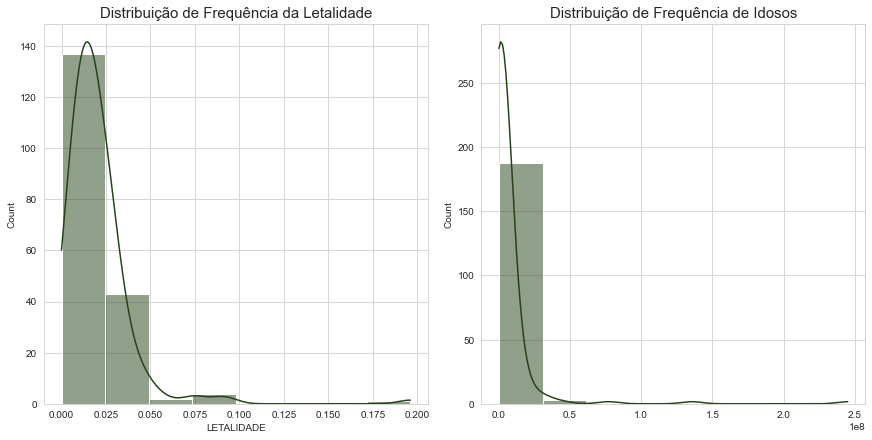

In [65]:
fig = plt.figure(constrained_layout=True)
gs = GridSpec(1, 2, figure=fig)
fig.set_size_inches(20,15)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

#Usando a Regra de Sturges para definir o número de bins
k = int(1 + 10/3 * np.log10(dfCondensada.shape[0]))

sns.set_style("whitegrid")
ax = sns.histplot(data=dfCondensada, x='LETALIDADE', bins=k, palette=sns.color_palette("husl", n_colors=6), kde=True, ax = ax0)
ax.set_title('Distribuição de Frequência da Letalidade', fontsize = 15)
ax.figure.set_size_inches(12,6)


sns.set_style("whitegrid")
ax = sns.histplot(data=(dfCondensada.ENTRE_60_80 + dfCondensada.ACIMA_80), bins=k, palette=sns.color_palette("husl", n_colors=1), kde=True, ax = ax1)
ax.set_title('Distribuição de Frequência de Idosos', fontsize = 15)
ax.figure.set_size_inches(12,6)

In [66]:
dfCondensada.CONTINENTE.value_counts()

AFRICA              54
ASIA                48
EUROPA              44
AMERICA LATINA      33
OCEANIA             14
AMERICA DO NORTE     2
Name: CONTINENTE, dtype: int64

Considera-se outliers na taxa de letalidade, países com mais de 0.048280702798412345.


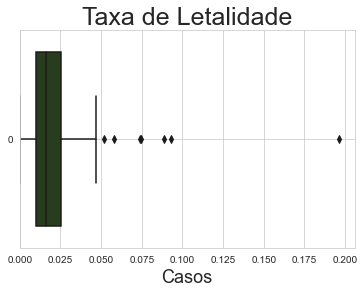

In [67]:
_, letalidade_sup =  outliers(dfCondensada.LETALIDADE) 

print(f'Considera-se outliers na taxa de letalidade, países com mais de {letalidade_sup}.')

sns.set_palette(sns.diverging_palette(120, 0, l=25, n=1))
ax0 = sns.boxplot(data=dfCondensada.LETALIDADE, orient='h')
ax0.set_title('Taxa de Letalidade', fontsize=25)
ax0.set_xlabel('Casos', fontsize=18)
ax0.set_xlim(xmin=0, xmax=(dfCondensada.LETALIDADE.max() * 1.05))
ax0.grid(True)

Text(0.5, 1.02, 'Correlação entre as Notas')

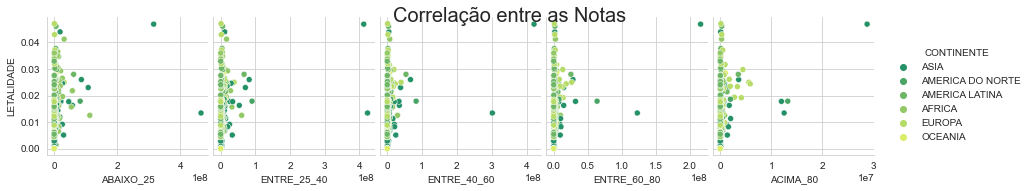

In [68]:
idade = ['ABAIXO_25', 'ENTRE_25_40','ENTRE_40_60', 'ENTRE_60_80', 'ACIMA_80']

sns.set_palette('summer')
ax = sns.pairplot(data=dfCondensada.query(f'LETALIDADE < {letalidade_sup}'), x_vars=idade, y_vars=['LETALIDADE'], hue='CONTINENTE')
ax.fig.suptitle('Correlação entre as Notas', y=1.02, fontsize=20)


In [70]:
dfCondensada.query(f'LETALIDADE >  {letalidade_sup}')[['PAIS', 'LETALIDADE']]

,PAIS,LETALIDADE
9,MEXICO,0.088750
13,EGYPT,0.057969
33,SUDAN,0.074748
42,PERU,0.093219
47,YEMEN,0.196078
66,SYRIA,0.073740
71,SOMALIA,0.051643
